<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.851 · Tipología y ciclo de vida de los datos · PRA2</p>
<p style="margin: 0; text-align:right;">2020-2 · Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación

</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PRA 2: Limpieza y análisis

En esta práctica se elabora un caso práctico orientado a aprender a identificar los datos relevantes para un proyecto analítico y usar las herramientas de integración, limpieza, validación y análisis de las mismas. Para hacer esta práctica tendréis que trabajar en grupos de 2 personas.

Tendréis que entregar un solo archivo con el enlace Github (https://github.com) donde haya las soluciones incluyendo los nombres de los componentes del equipo. Podéis utilizar la Wiki de Github para describir vuestro equipo y los diferentes archivos que corresponden a vuestra entrega. Cada miembro del equipo tendrá que contribuir con su usuario Github. Podeís utilizar estos ejemplos como guía:

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Trabajo realizado por:</strong> 
    
    - César Irnán Sillero
    - Lissette Muñoz Guillen
</div>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# Visualización
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline

# 1. Descripción del set de datos

<div style="background-color: #F4F6F6;">
    <hr>
Se ha seleccionado un conjunto de datos que contiene variables numéricas que miden la calidad del vino con un puntaje entre 0 y 10.
 
    1 - fixed_acidity: Cantidad de acidez fija, acidez total menos los ácidos volátiles (varibale numérica)
    2 - volatile acidity: Cantidad de acidez volatil (variable numérica)
    3 - citric acid: Cantidad de ácido cítrico (variable numérica)
    4 - residual sugar: Cantidad de azucar residual (variable numérica)
    5 - chlorides: Cantidad de cloruros de sodio (variable numérica)
    6 - free sulfur dioxide: Cantidad de díoxido de azufre libre (variable numérica)
    7 - total sulfur dioxide: Cantidad de díoxido de azufre total (variable numérica)
    8 - density: Densidad del vino (variable numérica)
    9 - pH: Medida de la acidez del vino (variable numérica)
    10 - sulphates: Cantidad de sulfato de potasio (variable numérica)
    11 - alcohol: Porcentaje por volumen (variable numérica)
   
    
La variable "target" 
    
    12 - quality: Puntuación entre 0 y 10
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Objetivos:</strong> 
</div>

<div style="background-color: #F4F6F6;">
 
    
Los objetivos concretos de esta práctica son:
    
    - Aprender a aplicar los conocimientos adquiridos y su capacidad de resolución de problemas en entornos nuevos o poco 
      conocidos dentro de contextos más amplios o multidisciplinares.
    - Saber identificar los datos relevantes y los tratamientos necesarios (integración, limpieza y validación) para llevar 
      a cabo un proyecto analítico.
    - Aprender a analizar los datos adecuadamente para abordar la información contenida en los datos.
    - Identificar la mejor representación de los resultados para aportar conclusiones sobre el problema planteado en el 
      proceso analítico.
    - Actuar con los principios éticos y legales relacionados con la manipulación de datos en función del ámbito de  
      aplicación.
    - Desarrollar las habilidades de aprendizaje que les permitan continuar estudiando de un modo que tendrá que ser en 
      gran medida autodirigido o autónomo.
    - Desarrollar la capacidad de búsqueda, gestión y uso de información y recursos en el ámbito de la ciencia de datos.
    
</div>

# 2. Integración y selección de los datos de interés a analizar.

<hr>
<div style="background-color: #F4F6F6;">
Con la carga de los datos, tenemos un set con 9 variables que proporcionan información de los clientes y una variable hipoteca que determina si fue o no otorgada la hipoteca.

Inicialmente exploraremos los datos
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Carga de los datos:</strong> 
</div>

In [2]:
wine = pd.read_csv("winequality-red.csv")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<div style="background-color: #F4F6F6;">
Realizaremos las operaciones básicas de estadistica descriptiva para todas las variables.
</div>

In [3]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# 3. Limpieza de datos.

<hr>
<div style="background-color: #F4F6F6;">
Con la carga de los datos, tenemos un set con 9 variables que proporcionan información de los clientes y una variable hipoteca que determina si fue o no otorgada la hipoteca.

Inicialmente exploraremos y haremos una limpieza de todas las variables.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Tratamiento de datos con ceros o elementos vacios</strong> 
</div>

<div style="background-color: #F4F6F6;">
Es común encontrar en los conjuntos de datos valores con elementos vacios o valores ceros que no son parte de los datos normales. Este hecho se puede dar por varias razones: porque estos datos no existen, no se registraron correctamente o un error de computo, es importante analizar estos datos ya que podrían causar errores en nuestros análisis.

Este tipo de datos pueden tratarse de las siguientes formas:

    - Eliminar las variables con un porcentaje alto de valores vacíos
    - Eliminar las filas con variables no disponibles
    - Imputar los datos o llenarlos con un valor por defecto
    
Entonces buscaremos los valores nulos en nuestro conjunto de datos con la función isnull().
</div>

In [4]:
wine_check=wine.isnull()
print(wine_check)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1596          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False   

      free sulfur dioxide  

In [5]:
wine.isnull().values.any()

False

<div style="background-color: #F4F6F6;">
Podemos observar que nuestro conjunto de datos no tiene valores nulos. La función anterior nos devolviera TRUE si existiera algún NaN en el DataFrame.
    
En el caso de existir este tipo de valores en nuestros datos los tratariamos de la siguinte manera:
    
    
    ....pendiente...
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Identificación y tratamiento de valores extremos</strong> 
</div>

<div style="background-color: #F4F6F6;">
Los valores extremos o tambien conocidos por su término en ingles "outliers", decimos que son los valores que se escapan al rango en donde se 
concentran la mayoría de muestras. Es necesario detectar esos valores, ya que pueden afectar considerablemente a los resultados que pueda
obtener el modelo, por ejemplo, para una regresión puede causar un efecto negativo en las predicciones.

Aún con estas consideraciones, los valores extremos pueden significar:

    1. Un error: Si existen valores fuera de la realidad como por ejemplo en un grupo de edades de personas, tener un
       registro con 170 años, lo que nos indicaría que es un error de carga de datos. 
    
    2. Limites: En otros casos, podemos tener valores que se escapan del “grupo medio”, pero queremos mantener el dato
       modificado, para que no perjudique modelo.
    
    3. Punto de Interés: Datos “anómalos” que pueden mantenerse o eliminarse de nuestros datos dependiendo cual sea el
       objetivo. Este no representa un error, puede ser un indicador de falta de datos.
   
Para identificar estos outliers en nuestro set de datos, vamos a representar cada una de las variables con un diagrama de
de caja con la función sns.boxplot, además, en la parte superior de cada gráfica mostraremos los cuartiles superior e inferior, así como la media de cada una de las variables.

De esta manera analizaremos cada variable y se dará el respectivo tratamiento a los valores extremos.

</div>

Cuartil inferior: 7.1  Cuartil superior: 9.2  Media: 8.319637273295838


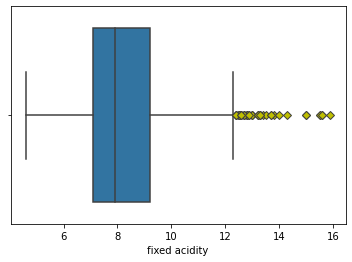

In [6]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["fixed acidity"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["fixed acidity"], 0.75))
iqrI =(np.quantile(wine["fixed acidity"], 0.25))
m=wine["fixed acidity"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">
De acuerdo a esta gráfica, tenemos muchos valores atípicos, que estan en el rango entre 12 y 16. Los valores de acidez fija pueden ser muy variantes en el vino por lo que en este caso dejaremos estos valores en nuestro conjunto de datos para ser parte del análisis.
</div>

Cuartil inferior: 0.39  Cuartil superior: 0.64  Media: 0.5278205128205131


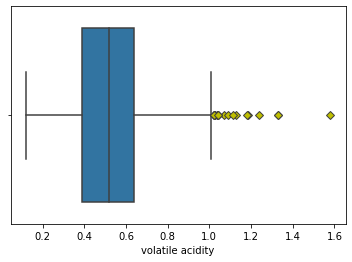

In [7]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["volatile acidity"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["volatile acidity"], 0.75))
iqrI =(np.quantile(wine["volatile acidity"], 0.25))
m=wine["volatile acidity"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">
Para la variable 'volatile acidity' se tiene varios valores atípicos en un rango de 1 y 1.4, quedando un solo valor cerca de 1.6. En el caso de la acidez volatil del vino, de acuerdo a (www.catadelvino.com) "La calidad de un vino es mayor cuanto menor es su acidez volátil", lo que podríamos considerar que este único valor atípico de 1.6 podría interferir en nuestro analisis, considerando los valores medios y cuartiles. 
 <hr>
Procedemos a eliminar este valor atípico para que no afecte nuestro análisis posterior.
</div>

In [8]:
ma=wine["volatile acidity"].max()
print ("Valor atípico a eliminarse:", ma)

#Eliminamos de nuestro conjunto de datos
wine = wine.drop(wine[wine['volatile acidity']==ma].index)

Valor atípico a eliminarse: 1.58


Cuartil inferior: 0.09  Cuartil superior: 0.42  Media: 0.2711451814768449


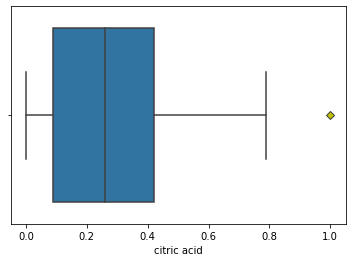

In [9]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["citric acid"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["citric acid"], 0.75))
iqrI =(np.quantile(wine["citric acid"], 0.25))
m=wine["citric acid"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">  
Se nos presenta en este caso también un único valor atipico, que se encuentra lejos de nuestra media. 
 <hr>
Procedemos a eliminar este valor atípico para que no afecte nuestro análisis posterior.
</div>

In [10]:
ma=wine["citric acid"].max()
print ("Valor atípico a eliminarse:", ma)

#Eliminamos de nuestro conjunto de datos
wine = wine.drop(wine[wine['citric acid']==ma].index)

Valor atípico a eliminarse: 1.0


Cuartil inferior: 1.9  Cuartil superior: 2.6  Media: 2.5385410144020057


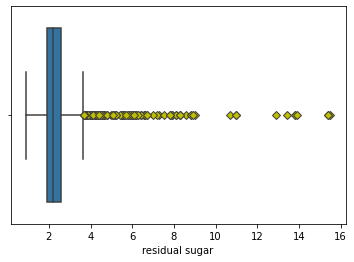

In [11]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["residual sugar"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["residual sugar"], 0.75))
iqrI =(np.quantile(wine["residual sugar"], 0.25))
m=wine["residual sugar"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">  
Al igual que en la variable acidez total, se presenta una gran cantidad de valores atípicos, en este caso la cantidad de azucar residual en el vino entre los valores de 4 a 16 son normales, por lo que no es necesario tratarlos, pues estos valores ayudarán a identificar la calidad del vino en los analisis posteriores.
</div>

Cuartil inferior: 0.07  Cuartil superior: 0.09  Media: 0.08710832811521577


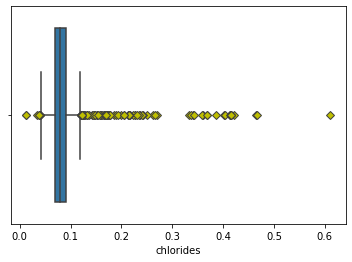

In [12]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["chlorides"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["chlorides"], 0.75))
iqrI =(np.quantile(wine["chlorides"], 0.25))
m=wine["chlorides"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">  
Para este caso, tenemos al igual que en la mayoria de las variables muchos valores atípicos de acuerdo al gráfico de caja, sin embargo, existe un solo valor extremo que se aleja demasiado de la media. Así que aplicaremos el mismo tratamiendo que en los otros casos, eliminandolo de nuestro conjunto.
</div>

In [13]:
ma=wine["chlorides"].max()
print ("chlorides:", ma)

#Eliminamos de nuestro conjunto de datos
wine = wine.drop(wine[wine['chlorides']==ma].index)

chlorides: 0.611


Cuartil inferior: 7.0  Cuartil superior: 21.0  Media: 15.8765664160401


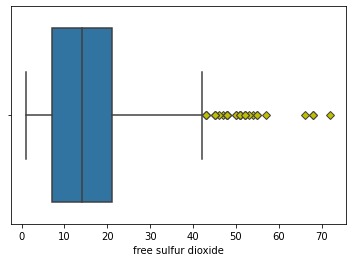

In [14]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["free sulfur dioxide"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["free sulfur dioxide"], 0.75))
iqrI =(np.quantile(wine["free sulfur dioxide"], 0.25))
m=wine["free sulfur dioxide"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">
Para la variable 'free sulfur dioxide', se observa en especial 3 valores atípicos que se encuentan lejos de la media. Sin embargo, investigando en (https://www.infoagro.com/instrumentos_medida/doc_sulfuroso_vino.asp?k=1), muestra una tabla donde los valores de 40 y 70 de SULFUROSO no son valores anormales en un vino, por lo que en este caso no aplicaremos ningún tratamiento.
</div>

Cuartil inferior: 22.0  Cuartil superior: 62.0  Media: 46.478070175438596


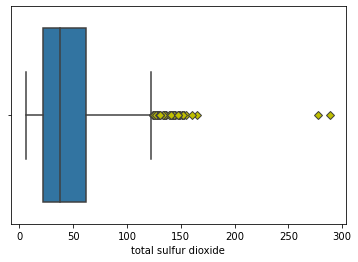

In [15]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["total sulfur dioxide"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["total sulfur dioxide"], 0.75))
iqrI =(np.quantile(wine["total sulfur dioxide"], 0.25))
m=wine["total sulfur dioxide"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">
En esta variable, tenemos dos valores que se encuentran demasiado alejados de la media, por lo que sí podrían causar ruído en nuestro analsis. 
<hr>
    
Eliminaremos estos dos valores de nuestro conjunto de datos.
</div>

In [16]:
ma=wine["total sulfur dioxide"].max() 
print ("Valor atípico a eliminarse 1:", ma)

#Eliminamos de nuestro conjunto de datos el primer extremo
wine = wine.drop(wine[wine['total sulfur dioxide']==ma].index)

#Ahora el segundo
ma1=wine["total sulfur dioxide"].max() 
print ("Valor atípico a eliminarse 2:", ma1)
wine = wine.drop(wine[wine['total sulfur dioxide']==ma1].index)

Valor atípico a eliminarse 1: 289.0
Valor atípico a eliminarse 2: 278.0


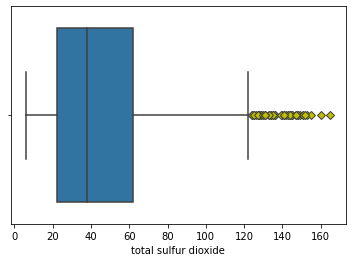

In [17]:
#Graficamos nuevamente, con los extremos eliminados
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["total sulfur dioxide"],flierprops=green_diamond)


Cuartil inferior: 3.21  Cuartil superior: 3.4  Media: 3.3118883312421583


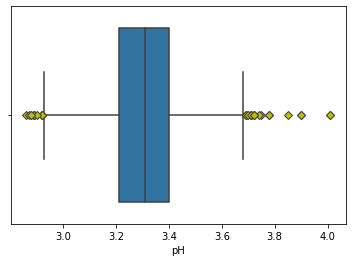

In [18]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["pH"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["pH"], 0.75))
iqrI =(np.quantile(wine["pH"], 0.25))
m=wine["pH"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">
Aquí no tenemos valores muy alejados de la media, por lo que todos serán considerados para nuestro análisis posterior.
</div>

Cuartil inferior: 0.55  Cuartil superior: 0.73  Media: 0.6572772898368888


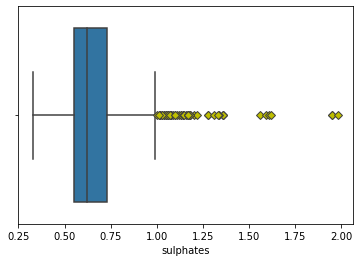

In [19]:
#Graficamos
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["sulphates"],flierprops=green_diamond)

#Valores de media y quartiles para el analisis
iqrS = (np.quantile(wine["sulphates"], 0.75))
iqrI =(np.quantile(wine["sulphates"], 0.25))
m=wine["sulphates"].mean()
print ("Cuartil inferior:", iqrI, " Cuartil superior:", iqrS, " Media:", m)

<div style="background-color: #F4F6F6;">
Para este caso, también contamos dos valores que se encuentran lejos de la media. Estos valores podrían afectar causar ruído a nuestro análisis.  

Los demás valores que se muestran como extremos en nuestra digrama de caja, son masivos por lo que serán considerados para nuestro analisis. 

<hr>
    
Trataremos únicamente los dos últimos valores extremos como en los casos anteriores eliminando de nuestro conjunto de datos.

</div>

In [20]:
ma=wine["sulphates"].max() 
print ("Valor atípico a eliminarse 1:", ma)

#Eliminamos de nuestro conjunto de datos el primer extremo
wine = wine.drop(wine[wine['total sulfur dioxide']==ma].index)

Valor atípico a eliminarse 1: 1.98


In [21]:
#Ahora el segundo
ma1=wine["sulphates"].max()
print ("Valor atípico a eliminarse 2:", ma1)
#wine = wine.drop(wine[wine['sulphates']==ma1].index)

Valor atípico a eliminarse 2: 1.98


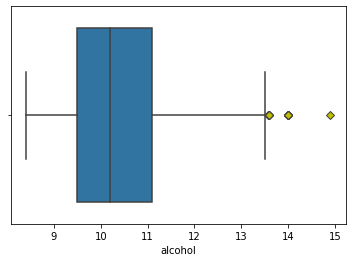

In [22]:
green_diamond = dict(markerfacecolor='y', marker='D')
ax = sns.boxplot(x=wine["alcohol"],flierprops=green_diamond)

<div style="background-color: #F4F6F6;">
Finalmente, con la variable 'Alcohol', si bien existen tres valores fuera del rango, estos no se encuentran tan alejados de la media. Considerando que niveles altos de alcohol en un vino no son valores incorrectos, no daremos ningún tratamiento a esta variable.

</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Resumen de la limpieza de datos</strong> 
</div>

<div style="background-color: #F4F6F6;">
...pendiente...
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exportación de los datos preprocesados</strong> 
</div>

In [23]:
wine.to_csv("winequality-red-clean.csv")

# 4. Análisis gráfico.

<hr>
<div style="background-color: #F4F6F6;">
Con la carga de los datos tratados, donde se ha analizado valores nulos, perdidos y extremos. A continuación, vamos a realizar un análisis gráfico de nuestras variables indicadora con la variable objetivo.
   

Las gráficas nos darán un indicador de aquellas variables que tienen mayor o menor relación con la variable objetivo.
    
</div>

<div style="background-color: #F4F6F6;">
Primero, cargamos nuestro set de datos preprocesado y observamos sus primeras 10 filas.
</div>

In [24]:
dataWine = pd.read_csv("winequality-red-clean.csv")
dataWine.head(10)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
